# 1. Описание набора данных, Постановка задачи, Описание выбранного классификатора

Этот проект представляет собой применение машинного обучения с программированием на Python на примере классификации цветов IRIS с использованием машинного обучения с инструментами scikit.
Здесь используются алгоритмы, которые представляют собой некоторые типы машинного обучения с учителем и без учителя.

## Набор данных

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических алгоритмов.

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

## Постановка задачи

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

## Описание классификатора

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

## 2. Подключение библиотек и Чтение данных

In [ ]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

# разделение выборки
from sklearn.model_selection import train_test_split
#деревья решений
from sklearn.tree import DecisionTreeClassifier, plot_tree
#метрики
from sklearn import metrics
#Нативный байесовский классификатор

In [39]:
# читаем данные
url = 'https://raw.githubusercontent.com/yakushinav/journ_prg/main/iris.csv'
data = pd.read_csv(url)
data.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


## 3. Характеристики набора данных и визуализация

In [ ]:
# типы полей
data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [27]:
# Описательная статистика, применяется для числовых полей
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
# Описательная статистика по каждому классу отдельно
data.groupby('species').describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [29]:
# количество объектов каждого класса
data.groupby('species').size()

,0
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

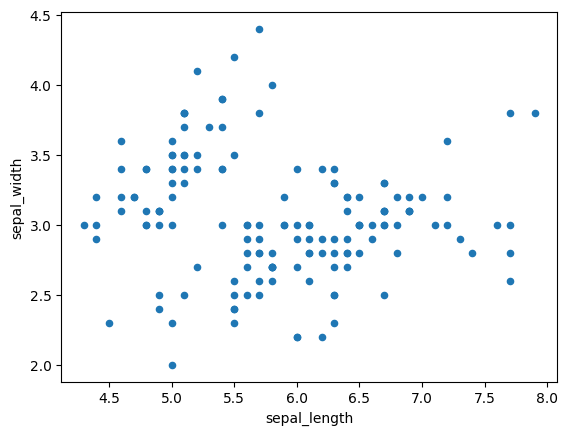

In [40]:
data.plot(kind='scatter',x='sepal_length', y='sepal_width') # создадим точечную диаграмму

<Axes: xlabel='petal_length', ylabel='petal_width'>

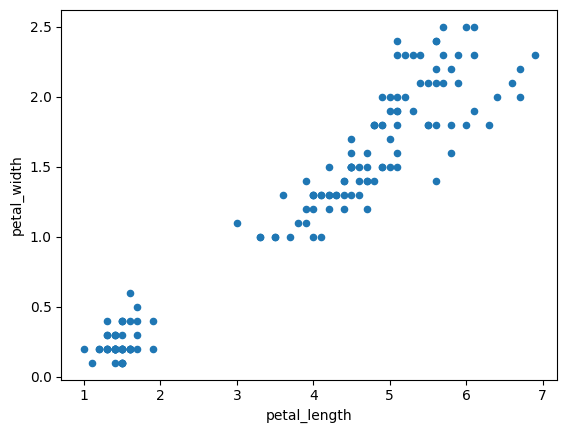

In [41]:
# создадим точечную диаграмму по petal_length	petal_width

data.plot(kind='scatter',x='petal_length', y='petal_width')

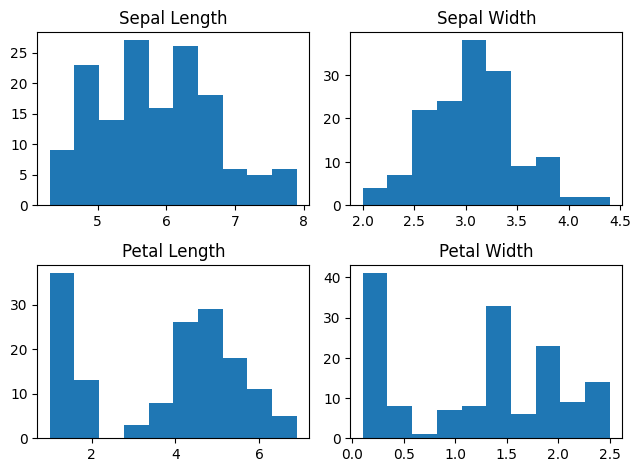

In [42]:
# Гистограммы по каждому параметру
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(data['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(data['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(data['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(data['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# добавим отступы между диаграммами
fig.tight_layout(pad=1.0);

## 4. Разделение выборки

In [34]:
# Разделим выборку на обучающую и тестовую
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)
# Выделим признаки и целевую переменную в каждой части
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

## 5. Создание модели машинного обучения

In [65]:
# Деревья решений
# Параметр random_state задает начальную инициализацию генератора псевдслучайных чисел, чтобы данные были одинаковые при каждом запуске

#Выбираем классификатор
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
#Проводим обучение
mod_dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=1)

## 6. Оценка качества модели машинного обучения

In [66]:
#Выполняем предсказание
y_pred=mod_dt.predict(X_test)

print('accuracy (точность) классификатора Деревья решений',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора Деревья решений 0.983
матрица ошибок
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


## 7. Применение построенной модели машинного обучения

In [38]:
test1=pd.DataFrame(data={'sepal_length':[4.9],'sepal_width':[3.6],'petal_length':[1.8],'petal_width':[0.7]})
print(test1)
class1=mod_dt.predict(test1)
print(class1)

   sepal_length  sepal_width  petal_length  petal_width
0           4.9          3.6           1.8          0.7
['Iris-setosa']


In [68]:
# prompt: применить 4 различных классификатора, сравнить результаты и выбрать лучший.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Logistic Regression
mod_lr = LogisticRegression(random_state=42)
mod_lr.fit(X_train, y_train)
y_pred_lr = mod_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy (точность) классификатора Логистическая регрессия:', "{:.3f}".format(acc_lr))
print("Матрица ошибок Логистическая регрессия:")
print(metrics.confusion_matrix(y_test, y_pred_lr))
print("-" * 30)

# K-Nearest Neighbors
mod_knn = KNeighborsClassifier(n_neighbors=5)
mod_knn.fit(X_train, y_train)
y_pred_knn = mod_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy (точность) классификатора Метод k-ближайших соседей:', "{:.3f}".format(acc_knn))
print("Матрица ошибок Метод k-ближайших соседей:")
print(metrics.confusion_matrix(y_test, y_pred_knn))
print("-" * 30)

# Gaussian Naive Bayes
mod_nb = GaussianNB()
mod_nb.fit(X_train, y_train)
y_pred_nb = mod_nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy (точность) классификатора Наивный байесовский классификатор:', "{:.3f}".format(acc_nb))
print("Матрица ошибок Наивный байесовский классификатор:")
print(metrics.confusion_matrix(y_test, y_pred_nb))
print("-" * 30)

# Decision Tree (from previous code)
y_pred_dt = mod_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy (точность) классификатора Деревья решений',"{:.3f}".format(acc_dt))
print("Матрица ошибок Деревья решений")
print(metrics.confusion_matrix(y_test, y_pred_dt))
print("-" * 30)


# Compare results and select the best
accuracies = {
    'Decision Tree': acc_dt,
    'Logistic Regression': acc_lr,
    'K-Nearest Neighbors': acc_knn,
    'Gaussian Naive Bayes': acc_nb
}

best_classifier = max(accuracies, key=accuracies.get)
print(f"Лучший классификатор на основе точности: {best_classifier} с точностью {accuracies[best_classifier]:.3f}")


Accuracy (точность) классификатора Логистическая регрессия: 0.950
Матрица ошибок Логистическая регрессия:
[[20  0  0]
 [ 0 19  1]
 [ 0  2 18]]
------------------------------
Accuracy (точность) классификатора Метод k-ближайших соседей: 0.933
Матрица ошибок Метод k-ближайших соседей:
[[20  0  0]
 [ 0 20  0]
 [ 0  4 16]]
------------------------------
Accuracy (точность) классификатора Наивный байесовский классификатор: 0.933
Матрица ошибок Наивный байесовский классификатор:
[[20  0  0]
 [ 0 19  1]
 [ 0  3 17]]
------------------------------
Accuracy (точность) классификатора Деревья решений 0.983
Матрица ошибок Деревья решений
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]
------------------------------
Лучший классификатор на основе точности: Decision Tree с точностью 0.983
